# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Kyiv, Kyiv City, Ukraine**, or **Ukraine** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Kyiv, Kyiv City, Ukraine** to Ann Arbor, USA. In that case at least one source file must be about **Kyiv, Kyiv City, Ukraine**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Kyiv, Kyiv City, Ukraine** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "drive/My Drive/applied_ds/applied_plotting/"

In [0]:
df = pd.read_csv(path + 'Odata2019MagFile.csv',sep=";") 
df

,OUTID,Birth,SEXTYPENAME,EONAME,EORegName,EOAreaName,EOTerName,TTest,TTestStatus,TBall100,TBall,TPTName,TPTRegName,TPTAreaName,TPTTerName,LTest,LTestStatus,LBall100,LBall,LPTName,LPTRegName,LPTAreaName,LPTTerName,ETest,ETestStatus,EBall100,EBall,EPTName,EPTRegName,EPTAreaName,engPTTerName,FTest,FTestStatus,fraBall100,FBall,FPTName,FPTRegName,FPTAreaName,FPTTerName,DTest,DTestStatus,DBall100,DBall,DPTName,DPTRegName,DPTAreaName,DPTTerName,STest,STestStatus,SBall100,SBall,SPTName,SPTRegName,SPTAreaName,SPTTerName
0,8f79c403-7700-11e9-9690-f4034343392c,1997,чоловіча,Хмельницький університет управління та права,Хмельницька область,м.Хмельницький,м.Хмельницький,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Англійська мова (II зміна),Зараховано,"117,0",15.0,Хмельницька гуманітарно-педагогічна академія,Хмельницька область,м.Хмельницький,м.Хмельницький,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7bfe2606-7700-11e9-9690-f4034343392c,1998,чоловіча,Харківський національний університет імені В.Н...,Харківська область,м.Харків. Шевченківський район міста,Шевченківський район міста,ТЗНПК,Зараховано,"127,0",11.0,"Національний технічний університет ""Харківськи...",Харківська область,м.Харків. Київський район міста,Київський район міста,Право,Зараховано,"105,0",37.0,"Національний технічний університет ""Харківськи...",Харківська область,м.Харків. Київський район міста,Київський район міста,Англійська мова (II зміна),Зараховано,"117,0",15.0,Харківський навчально-науковий інститут Держав...,Харківська область,м.Харків. Шевченківський район міста,Шевченківський район міста,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b8eea907-7700-11e9-9690-f4034343392c,1995,чоловіча,"Національний університет ""Одеська юридична ака...",Одеська область,м.Одеса. Приморський район міста,Приморський район міста,ТЗНПК,Зараховано,"158,0",15.0,Національний університет «Одеська юридична ака...,Одеська область,м.Одеса. Приморський район міста,Приморський район міста,Право,Зараховано,"162,0",54.0,Національний університет «Одеська юридична ака...,Одеська область,м.Одеса. Приморський район міста,Приморський район міста,Англійська мова (II зміна),Зараховано,"154,0",25.0,Національний університет «Одеська юридична ака...,Одеська область,м.Одеса. Приморський район міста,Приморський район міста,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9cf8b822-7700-11e9-9690-f4034343392c,1998,жіноча,"Приватне акціонерне товариство ""Вищий навчальн...",м.Київ,м.Київ. Солом'янський район міста,Солом'янський район міста,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Англійська мова (II зміна),Зараховано,"106,0",13.0,"Державний вищий навчальний заклад ""Київський н...",м.Київ,м.Київ. Шевченківський район міста,Шевченківський район міста,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0935dc2b-7700-11e9-9690-f4034343392c,1998,жіноча,Харківський національний університет імені В.Н...,Харківська область,м.Харків. Шевченківський район міста,Шевченківський район міста,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Англійська мова (I зміна),Зараховано,"100,0",12.0,Харківський навчально-науковий інститут Держав...,Харківська область,м.Харків. Шевченківський район міста,Шевченківський район міста,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65409,13ed41f3-85ff-11e9-9690-f4034343392c,1996,чоловіча,Харківський національний університет імені В.Н...,Харківська область,м.Харків. Шевченківський район міста,Шевченківський район міста,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [0]:
lawayr = df.dropna(subset=['TBall100', 'LBall100'])
lawayr["TBall100"]= lawayr["TBall100"].astype(str) 
lawayr["TBall100"] = [float(str(x).replace(",", ".")) for x in list(lawayr["TBall100"])]

t_mean = lawayr[lawayr["TTestStatus"] =="Зараховано"].set_index('EONAME').groupby(level = 0)['TBall100'].agg(['mean', 'count'])


lawayr["LBall100"]= lawayr["LBall100"].astype(str) 
lawayr["LBall100"] = [float(str(x).replace(",", ".")) for x in list(lawayr["LBall100"])]

l_mean = lawayr[lawayr["LTestStatus"] =="Зараховано"].set_index('EONAME').groupby(level = 0)['LBall100'].agg(['mean', 'count'])


lawayr = lawayr.dropna(subset=['EBall100'])
lawayr["EBall100"]= lawayr["EBall100"].astype(str) 
lawayr["EBall100"] = [float(str(x).replace(",", ".")) for x in list(lawayr["EBall100"])]

e_mean = lawayr[lawayr["ETestStatus"] =="Зараховано"].set_index('EONAME').groupby(level = 0)['EBall100'].agg(['mean', 'count'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [0]:
t_mean = t_mean.sort_values('mean', ascending=False)
t_mean

,mean,count
EONAME,,
Донбаська державна машинобудівна академія,178.0,1
"Вищий навчальний заклад ""Український католицький університет""",177.0,2
Харківська державна академія культури,174.0,1
Національна металургійна академія України,173.5,2
Горлівський інститут іноземних мов ДВНЗ «Донбаський державний педагогічний університет»,169.0,1
...,...,...
"Національний технічний університет ""Харківський політехнічний інститут""",104.5,2
Хмельницький національний університет,103.0,3
"Приватний вищий навчальний заклад ""Вінницький фінансово-економічний університет""",100.0,1


In [0]:
l_mean = l_mean.sort_values('mean', ascending=False)[l_mean["count"] >50]
l_mean

,mean,count
EONAME,,
"Національний університет ""Києво-Могилянська академія""",156.958763,97
Львівський національний університет імені Івана Франка,152.487437,398
Київський національний університет імені Тараса Шевченка,146.761733,554
Національний юридичний університет імені Ярослава Мудрого,144.571314,1248
"Національний університет ""Острозька академія""",141.723684,76
Чернівецький національний університет імені Юрія Федьковича,137.937198,207
Донецький національний університет імені Василя Стуса,137.704762,105
Полтавський юридичний інститут Національного юридичного університету імені Ярослава Мудрого,137.608974,156
Державний вищий навчальний заклад «Ужгородський національний університет»,135.338583,127


In [0]:
e_mean = e_mean.sort_values('mean', ascending=False)
e_mean

,mean,count
EONAME,,
"Національний університет ""Києво-Могилянська академія""",177.397959,98
Національна металургійна академія України,175.500000,2
Національний фармацевтичний університет,174.000000,1
"Вищий навчальний заклад ""Український католицький університет""",171.500000,2
Київський національний університет імені Тараса Шевченка,165.242938,531
...,...,...
Одеський державний екологічний університет,104.800000,5
"Державний вищий навчальний заклад ""Приазовський державний технічний університет""",100.000000,1
Вінницький кооперативний інститут,100.000000,1


In [0]:
# remove other lang
english_set = df.dropna(subset=['ETest'])

<BarContainer object of 31 artists>

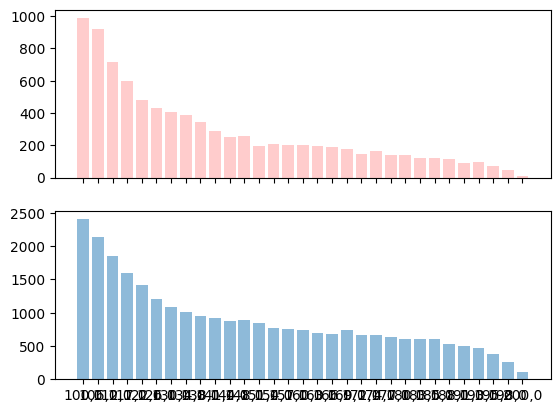

In [0]:
# english general
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
axs = [ax1,ax2]
english = english_set[english_set["ETestStatus"] =="Зараховано"]
l_passed = english[english["TTest"] =="ТЗНПК"].groupby("EBall100")["EBall100"].count()
others_passed = english[english["TTest"] !="ТЗНПК"].groupby("EBall100")["EBall100"].count()


ax1.bar(list(l_passed.index), list(l_passed), align='center', color ="red", alpha=0.2)
ax2.bar(list(others_passed.index), list(others_passed), align='center', alpha=0.5)    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


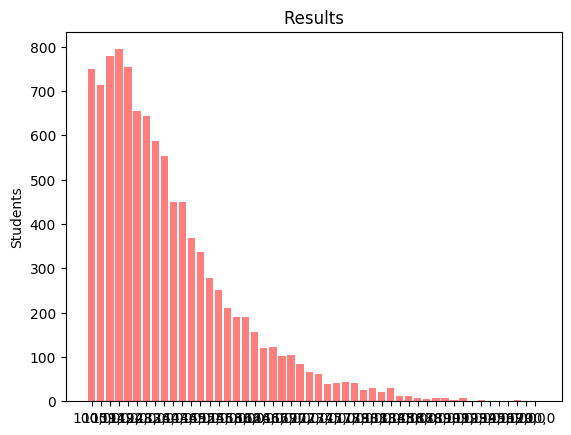

In [0]:
# l
passed = df[df["LTestStatus"] =="Зараховано"][df["TTest"] =="ТЗНПК"]
passed_range = passed.groupby("LBall100")["LBall100"].count()
y_pos = passed_range.index

plt.bar(list(y_pos), list(passed_range), align='center', color="red", alpha=0.5)

plt.ylabel('Students')
plt.title('Results')

plt.show()

In [0]:
comp = pd.read_excel(path + 'KONKURS_Universities.xlsx', skiprows=2).dropna(subset=['Спеціальність'])
comp

,Спеціальність,Спеціалізація,Форма навчання,ОКР,Орган управління,Код закладу,Назва закладу,Усього подано заяв,Подано заяв на бюджет,Допущено до конкурсу,Середній пріоритет допущених,Усього рекомендовано,Середній пріоритет рекомендованих,Суперобсяг,Фіксований обсяг,Рекомендовано за співбесідою,Рекомендовано за квотою-2,Широкий конкурс,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Фіксовані обсяги / Регіональне замовлення,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
2,012 Дошкільна освіта,NaN,Денна,Бакалавр,Міністерство освіти і науки України,3.0,Полтавський національний педагогічний універси...,329.0,266.0,266.0,2.612782,22.0,1.909091,615.0,0.0,0.0,0.0,22,20,2,0,0,2,162.894,169.783,181.05,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,012 Дошкільна освіта,NaN,Денна,Бакалавр,Міністерство освіти і науки України,17.0,"Державний вищий навчальний заклад ""Донбаський ...",179.0,165.0,160.0,2.856250,38.0,2.289474,0.0,38.0,0.0,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,38,37,1,0,0,0,2.32432,134.191,152.848,179.816
4,012 Дошкільна освіта,NaN,Денна,Бакалавр,Міністерство освіти і науки України,19.0,Маріупольський державний університет,121.0,104.0,100.0,2.490000,15.0,2.066667,0.0,15.0,0.0,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,15,11,4,0,0,0,2.45455,164.424,171.156,178.36
5,012 Дошкільна освіта,NaN,Денна,Бакалавр,Міністерство освіти і науки України,33.0,Сумський державний педагогічний університет ім...,184.0,165.0,163.0,2.822086,14.0,1.785714,615.0,0.0,0.0,0.0,14,13,1,0,0,1.53846,166.296,170.294,176.941,0,0,0,0,0,0,NaN,NaN,NaN,NaN
6,012 Дошкільна освіта,NaN,Денна,Бакалавр,Міністерство освіти і науки України,40.0,Рівненський державний гуманітарний університет,434.0,399.0,394.0,3.068528,37.0,2.135135,615.0,0.0,0.0,0.0,37,36,1,0,0,2.02778,167.659,174.216,188.08,0,0,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,293 Міжнародне право,NaN,Денна,Бакалавр,Міністерство освіти і науки України,337.0,"Державний вищий навчальний заклад ""Київський н...",410.0,226.0,219.0,3.890411,3.0,2.333333,65.0,0.0,0.0,1.0,2,1,1,0,0,5,195.2,195.2,195.2,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4673,293 Міжнародне право,NaN,Денна,Бакалавр,Міністерство освіти і науки України,1486.0,Університет митної справи та фінансів,326.0,140.0,134.0,3.432836,1.0,1.000000,65.0,0.0,0.0,0.0,1,1,0,0,0,1,197.064,197.064,197.064,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4674,293 Міжнародне право,NaN,Денна,Бакалавр,Обласна рада,275.0,Хмельницький університет управління та права і...,83.0,69.0,68.0,3.588235,9.0,4.111111,0.0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,9,9,0,0,0,0,4.11111,181.428,185.158,189.228
4675,293 Міжнародне право,NaN,Денна,Бакалавр,Державна фіскальна служба України,3457.0,Університет державної фіскальної служби України,124.0,83.0,77.0,3.883117,10.0,4.300000,0.0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,10,10,0,0,0,0,4.3,179.826,182.452,186.966


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<BarContainer object of 65 artists>

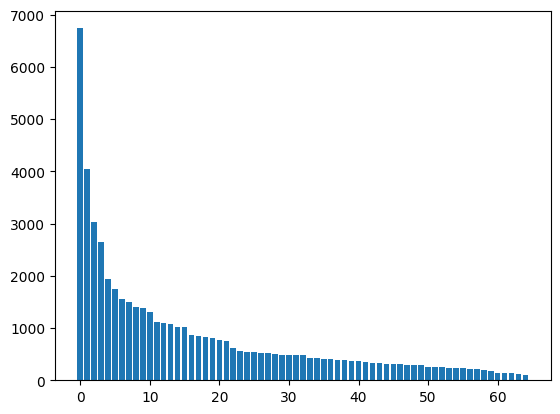

In [0]:
# 
c = comp[comp["Спеціальність"]=="081 Право"].set_index('Назва закладу').groupby(level = 0)['Усього подано заяв'].agg(['sum', 'count'])
c = c.sort_values('sum', ascending=False)[c["sum"] >100]
plt.bar(range(c.shape[0]), c["sum"])

In [0]:
c

,Назва закладу,sum,count
0,Національний юридичний університет імені Яросл...,6740.0,1
1,"Національний університет ""Одеська юридична ака...",4042.0,1
2,Львівський національний університет імені Іван...,3032.0,1
3,Київський національний університет імені Тарас...,2656.0,1
4,"Національний університет ""Львівська політехніка""",1939.0,1
...,...,...,...
60,Національний університет кораблебудування імен...,139.0,1
61,"Національний університет ""Чернігівський колегі...",136.0,1
62,Кременчуцький національний університет імені М...,134.0,1
63,Мелітопольський державний педагогічний універс...,122.0,1


In [0]:
c = c.reset_index()


In [0]:
english_df = df.dropna(subset=['ETest'])
english_df = english_df[english_df["ETestStatus"] =="Зараховано"][english_df["TTest"] !="ТЗНПК"]
english_df["EBall100"]= english_df["EBall100"].astype(str) 
english_df["EBall100"] = [float(str(x).replace(",", ".")) for x in list(english_df["EBall100"])]

others_passed = english_df.set_index('EONAME').groupby(level = 0)['EBall100'].agg(['mean'])
others_passed


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,mean
EONAME,
Івано-Франківський національний технічний університет нафти і газу,140.549383
Ізмаїльський державний гуманітарний університет,125.428571
"Індустріальний інститут Державного вищого навчального закладу ""Донецький національний технічний університет""",138.000000
Інститут державного управління у сфері цивільного захисту,112.000000
Інститут підготовки кадрів державної служби зайнятості України,145.000000
...,...
Черкаський національний університет імені Богдана Хмельницького,140.204301
Черкаський інститут пожежної безпеки імені Героїв Чорнобиля Національного університету цивільного захисту України,121.142857
Чернівецький національний університет імені Юрія Федьковича,138.503831


In [0]:
def bar_color(y,best,heigh):
    if y > heigh :
        return "#f9fcfb"
    elif heigh >= best:
        return "#21bf73"
    else:
        return "#b0eacd"

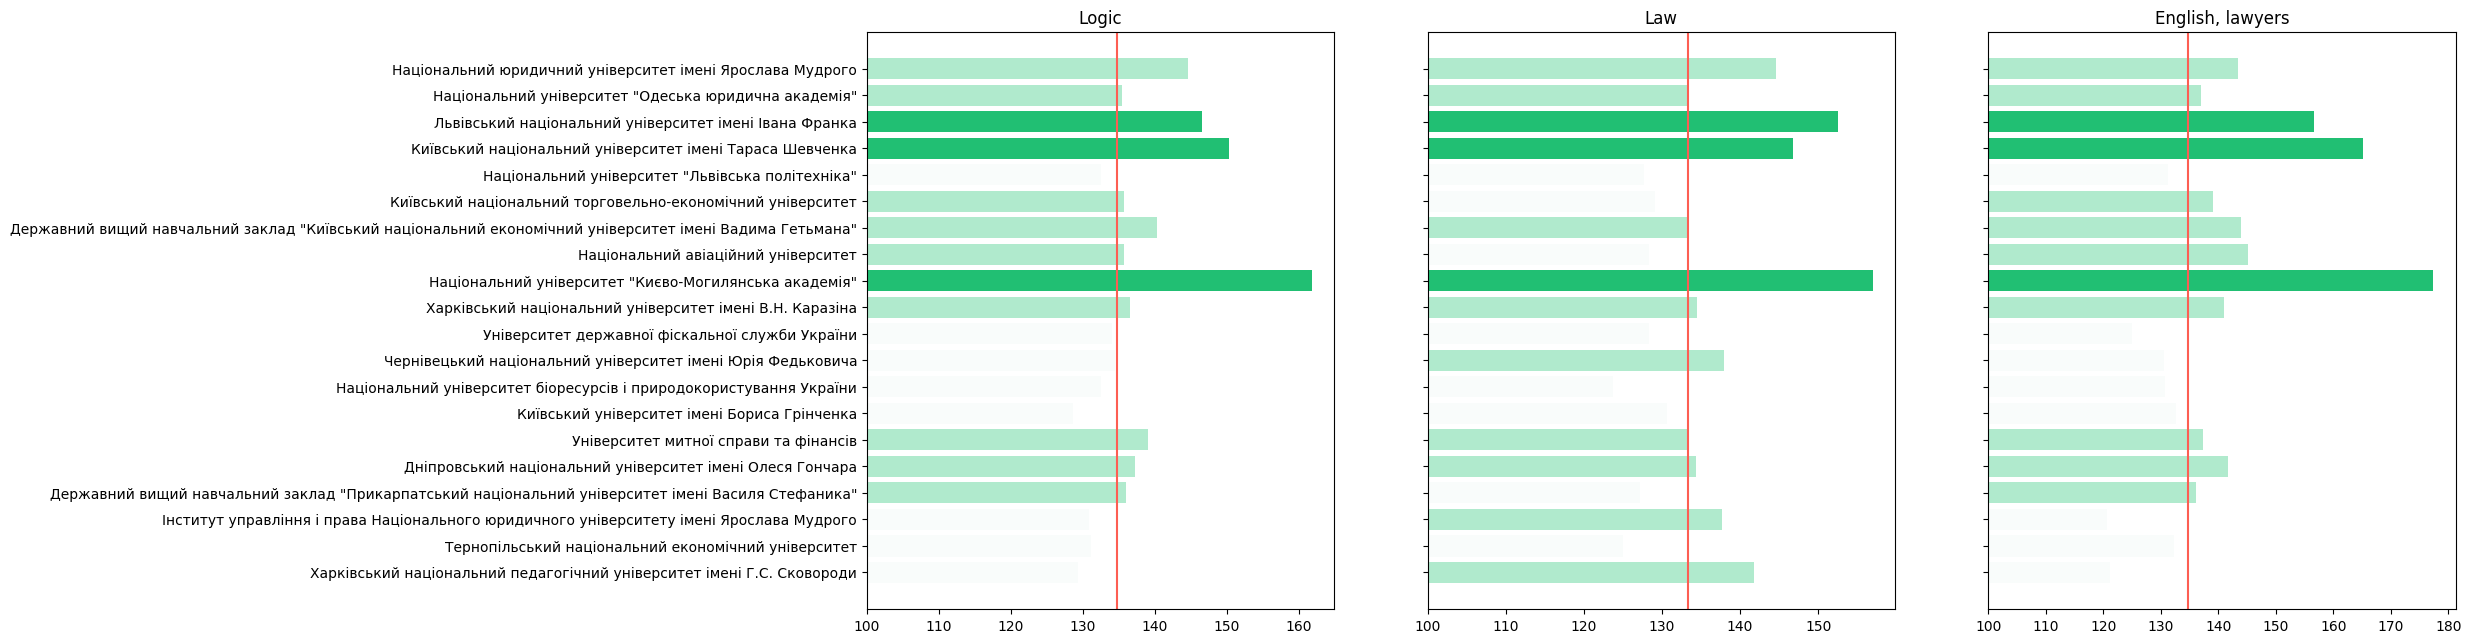

In [0]:
merged_e = pd.merge(c,e_mean, how="inner",right_on="EONAME", left_on="Назва закладу")
merged_t = pd.merge(c,t_mean, how="inner",right_on="EONAME", left_on="Назва закладу")
merged_l = pd.merge(c,l_mean, how="inner",right_on="EONAME", left_on="Назва закладу")
merged_eo = pd.merge(c,others_passed, how="inner",right_on="EONAME", left_on="Назва закладу")

merged = [merged_t,merged_l, merged_e]
label = ["Logic","Law","English, lawyers", "English, not lawyers"]

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True)
axs = [ax1,ax2,ax3]
fig.set_size_inches(20.5, 7.5, forward=True)

for i in range(0,len(merged)): 
    mean = merged[i]["mean"].mean() - 100
    frame = merged[i].dropna(subset=["mean"]).iloc[:20]
    x = frame["mean"] -100
    best = np.min(sorted(list(x))[-3:])
    colors = [bar_color(mean,best, val) for val in x]
    y_pos = list(frame["Назва закладу"])
    axs[i].barh(y_pos, x,  color = colors ,height=0.8)
    axs[i].axvline(x = mean, color = "#fd5e53")
    axs[i].set_xticklabels(np.arange(100, 200, 10)) 
    axs[i].invert_yaxis()
    axs[i].set_title(label[i])  